Experiment 4: Permutation Feature Importance (PFI) for Model Interpretation
Name: Vanraj Desai
Batch: A1

Objective:
To understand and implement Permutation Feature Importance technique for
interpreting machine learning models using the Wine Quality dataset.


In [9]:
# ============================================================================
# SECTION 1: Import Required Libraries
# ============================================================================
print("="*70)
print("EXPERIMENT 4: PERMUTATION FEATURE IMPORTANCE")
print("Dataset: Wine Quality Dataset")
print("="*70)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

EXPERIMENT 4: PERMUTATION FEATURE IMPORTANCE
Dataset: Wine Quality Dataset


In [10]:
# ============================================================================
# SECTION 2: Load and Explore Dataset
# ============================================================================
print("\n[STEP 1] Loading Wine Quality Dataset...")
print("-"*70)

# Load the wine quality dataset (red wine)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

print(f"Dataset Shape: {data.shape}")
print(f"Number of Features: {data.shape[1] - 1}")
print(f"Number of Samples: {data.shape[0]}")

print("\n[Dataset Preview]")
print(data.head(10))

print("\n[Dataset Information]")
print(data.info())

print("\n[Statistical Summary]")
print(data.describe())

print("\n[Target Variable Distribution - Wine Quality Ratings]")
print(data['quality'].value_counts().sort_index())

# Create binary classification: Good wine (quality >= 6) vs Bad wine (quality < 6)
data['quality_binary'] = (data['quality'] >= 6).astype(int)
print(f"\n[Binary Classification]")
print(f"Low Quality (< 6): {(data['quality_binary']==0).sum()} samples")
print(f"High Quality (>= 6): {(data['quality_binary']==1).sum()} samples")

# Check for missing values
print("\n[Missing Values Check]")
print(data.isnull().sum())


[STEP 1] Loading Wine Quality Dataset...
----------------------------------------------------------------------
Dataset Shape: (1599, 12)
Number of Features: 11
Number of Samples: 1599

[Dataset Preview]
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.

In [11]:
# ============================================================================
# SECTION 3: Data Preprocessing
# ============================================================================
print("\n[STEP 2] Preparing Data for Model Training...")
print("-"*70)

# Separate features and target
X = data.drop(['quality', 'quality_binary'], axis=1)
y = data['quality_binary']

print(f"Feature Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")
print(f"\nFeature Names:")
for idx, col in enumerate(X.columns, 1):
    print(f"  {idx}. {col}")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

print(f"\nTraining Set: {X_train.shape[0]} samples")
print(f"Testing Set: {X_test.shape[0]} samples")
print(f"Train/Test Split: {80}/{20}")

# Check class balance
print(f"\n[Class Distribution in Training Set]")
print(f"Low Quality: {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"High Quality: {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")


[STEP 2] Preparing Data for Model Training...
----------------------------------------------------------------------
Feature Matrix Shape: (1599, 11)
Target Vector Shape: (1599,)

Feature Names:
  1. fixed acidity
  2. volatile acidity
  3. citric acid
  4. residual sugar
  5. chlorides
  6. free sulfur dioxide
  7. total sulfur dioxide
  8. density
  9. pH
  10. sulphates
  11. alcohol

Training Set: 1279 samples
Testing Set: 320 samples
Train/Test Split: 80/20

[Class Distribution in Training Set]
Low Quality: 595 (46.5%)
High Quality: 684 (53.5%)


In [12]:
# ============================================================================
# SECTION 4: Model Training
# ============================================================================
print("\n[STEP 3] Training Random Forest Classifier...")
print("-"*70)

# Initialize and train the model
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2
)

model.fit(X_train, y_train)
print("✓ Model training completed successfully")

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate model performance
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"\n[Model Performance]")
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Testing Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Accuracy Difference: {(train_accuracy - test_accuracy):.4f}")

if train_accuracy - test_accuracy > 0.1:
    print("⚠ Warning: Possible overfitting detected")
else:
    print("✓ Good generalization performance")

print("\n[Classification Report - Test Set]")
print(classification_report(y_test, y_pred_test,
                          target_names=['Low Quality', 'High Quality']))


[STEP 3] Training Random Forest Classifier...
----------------------------------------------------------------------
✓ Model training completed successfully

[Model Performance]
Training Accuracy: 0.9742 (97.42%)
Testing Accuracy: 0.7969 (79.69%)
Accuracy Difference: 0.1773
⚠ Warning: Possible overfitting detected

[Classification Report - Test Set]
              precision    recall  f1-score   support

 Low Quality       0.78      0.79      0.78       149
High Quality       0.82      0.80      0.81       171

    accuracy                           0.80       320
   macro avg       0.80      0.80      0.80       320
weighted avg       0.80      0.80      0.80       320



In [13]:
# ============================================================================
# SECTION 5: Permutation Feature Importance Calculation
# ============================================================================
print("\n[STEP 4] Calculating Permutation Feature Importance...")
print("-"*70)

# Calculate permutation importance
result = permutation_importance(
    model,
    X_test,
    y_test,
    scoring='accuracy',
    n_repeats=10,  # Number of times to permute each feature
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Create importance DataFrame
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance_Mean': result.importances_mean,
    'Importance_Std': result.importances_std
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance_Mean', ascending=False)
importance_df['Rank'] = range(1, len(importance_df) + 1)

print("\n[Permutation Feature Importance Results]")
print("="*70)
print(importance_df.to_string(index=False))
print("="*70)

print(f"\n[Key Insights]")
print(f"Most Important Feature: {importance_df.iloc[0]['Feature']}")
print(f"  → Importance Score: {importance_df.iloc[0]['Importance_Mean']:.4f}")
print(f"  → Std Deviation: ±{importance_df.iloc[0]['Importance_Std']:.4f}")

print(f"\nLeast Important Feature: {importance_df.iloc[-1]['Feature']}")
print(f"  → Importance Score: {importance_df.iloc[-1]['Importance_Mean']:.4f}")
print(f"  → Std Deviation: ±{importance_df.iloc[-1]['Importance_Std']:.4f}")


[STEP 4] Calculating Permutation Feature Importance...
----------------------------------------------------------------------

[Permutation Feature Importance Results]
             Feature  Importance_Mean  Importance_Std  Rank
             alcohol         0.090313        0.016855     1
           sulphates         0.055000        0.019774     2
    volatile acidity         0.035313        0.010369     3
total sulfur dioxide         0.019375        0.012484     4
 free sulfur dioxide         0.013750        0.007153     5
                  pH         0.011563        0.006710     6
       fixed acidity         0.010625        0.006875     7
         citric acid         0.007500        0.009703     8
             density         0.007188        0.006100     9
      residual sugar         0.001250        0.007680    10
           chlorides        -0.001563        0.004891    11

[Key Insights]
Most Important Feature: alcohol
  → Importance Score: 0.0903
  → Std Deviation: ±0.0169

Least 


[STEP 5] Generating Visualizations...
----------------------------------------------------------------------


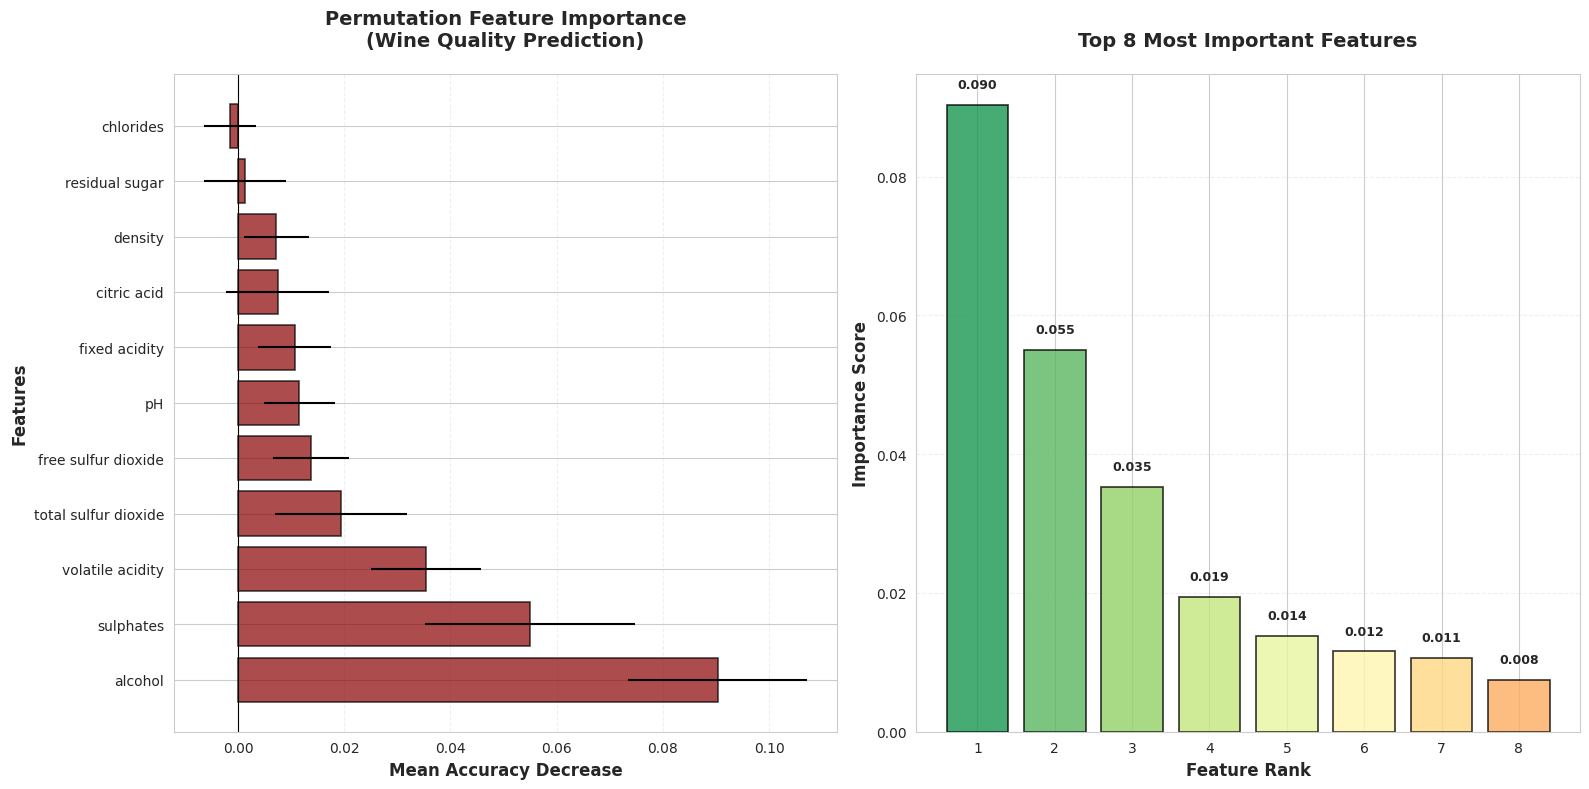

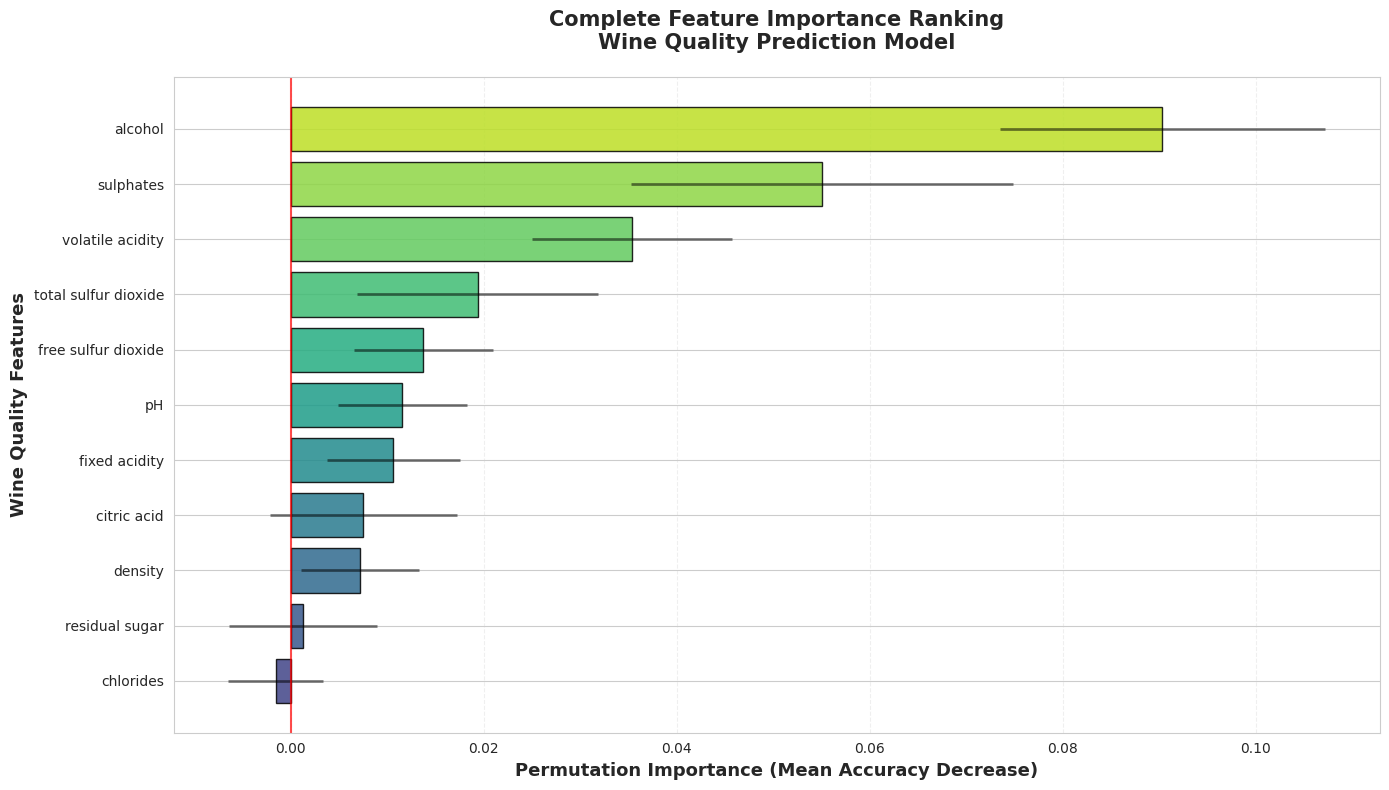

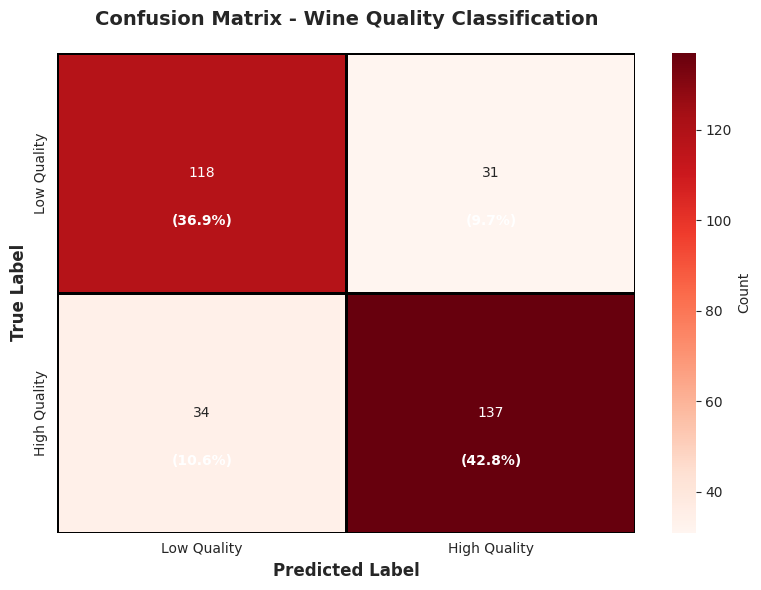

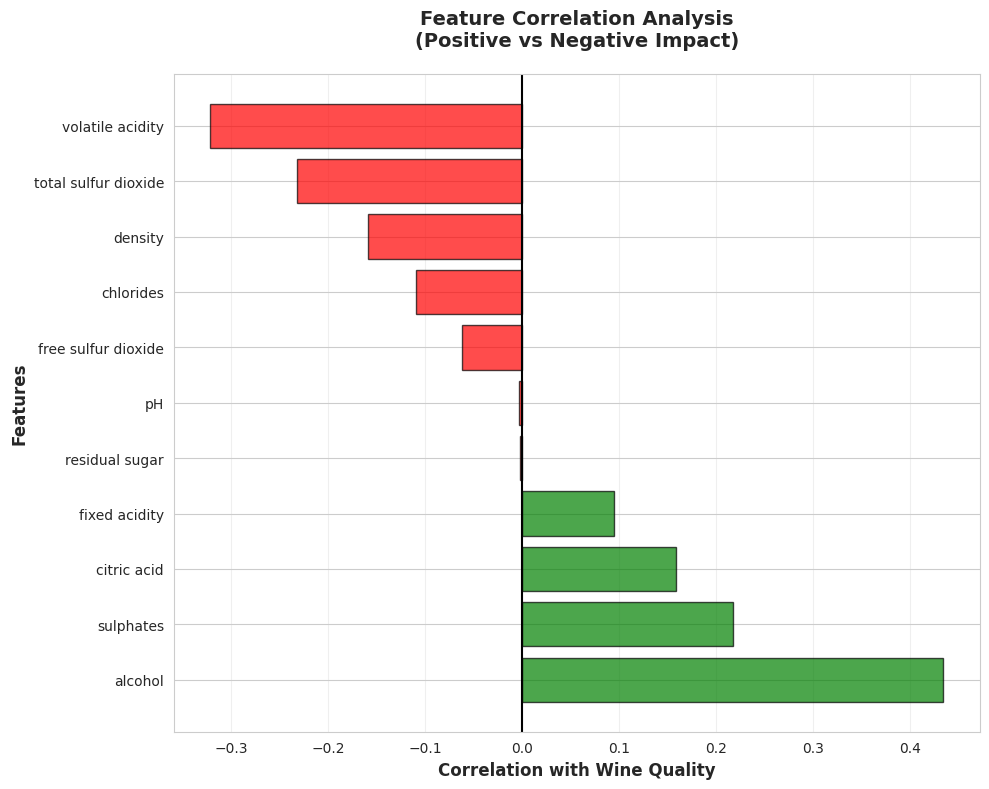

In [14]:
# ============================================================================
# SECTION 6: Visualizations
# ============================================================================
print("\n[STEP 5] Generating Visualizations...")
print("-"*70)

# Figure 1: Horizontal Bar Plot with Error Bars
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot 1: Permutation Importance with Standard Deviation
axes[0].barh(importance_df['Feature'], importance_df['Importance_Mean'],
             xerr=importance_df['Importance_Std'],
             color='darkred', alpha=0.7, edgecolor='black', linewidth=1.2)
axes[0].set_xlabel('Mean Accuracy Decrease', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Features', fontsize=12, fontweight='bold')
axes[0].set_title('Permutation Feature Importance\n(Wine Quality Prediction)',
                  fontsize=14, fontweight='bold', pad=20)
axes[0].grid(axis='x', alpha=0.3, linestyle='--')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Plot 2: Importance Distribution (Top Features)
top_features = importance_df.head(8)
colors = plt.cm.RdYlGn(np.linspace(0.9, 0.3, len(top_features)))
axes[1].bar(range(len(top_features)), top_features['Importance_Mean'],
            color=colors, edgecolor='black', alpha=0.8, linewidth=1.2)
axes[1].set_xlabel('Feature Rank', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Importance Score', fontsize=12, fontweight='bold')
axes[1].set_title('Top 8 Most Important Features',
                  fontsize=14, fontweight='bold', pad=20)
axes[1].set_xticks(range(len(top_features)))
axes[1].set_xticklabels([f"{i+1}" for i in range(len(top_features))])
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for i, v in enumerate(top_features['Importance_Mean']):
    axes[1].text(i, v + 0.002, f'{v:.3f}', ha='center', va='bottom',
                fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

# Figure 2: Feature Importance Comparison
fig, ax = plt.subplots(figsize=(14, 8))
sorted_idx = importance_df.sort_values('Importance_Mean', ascending=True).index
positions = np.arange(len(importance_df))

# Create horizontal bar plot with gradient colors
colors_gradient = plt.cm.viridis(np.linspace(0.2, 0.9, len(importance_df)))
bars = ax.barh(positions,
               importance_df.sort_values('Importance_Mean', ascending=True)['Importance_Mean'],
               xerr=importance_df.sort_values('Importance_Mean', ascending=True)['Importance_Std'],
               color=colors_gradient, edgecolor='black', linewidth=1, alpha=0.85,
               error_kw={'linewidth': 2, 'ecolor': 'black', 'alpha': 0.5})

ax.set_yticks(positions)
ax.set_yticklabels(importance_df.sort_values('Importance_Mean', ascending=True)['Feature'])
ax.set_xlabel('Permutation Importance (Mean Accuracy Decrease)', fontsize=13, fontweight='bold')
ax.set_ylabel('Wine Quality Features', fontsize=13, fontweight='bold')
ax.set_title('Complete Feature Importance Ranking\nWine Quality Prediction Model',
             fontsize=15, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3, linestyle='--')
ax.axvline(x=0, color='red', linestyle='-', linewidth=1.5, alpha=0.7)

plt.tight_layout()
plt.show()

# Figure 3: Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', ax=ax,
            xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'],
            cbar_kws={'label': 'Count'}, linewidths=2, linecolor='black')
ax.set_xlabel('Predicted Label', fontsize=12, fontweight='bold')
ax.set_ylabel('True Label', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix - Wine Quality Classification',
             fontsize=14, fontweight='bold', pad=20)

# Add percentage annotations
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / cm.sum() * 100
        ax.text(j + 0.5, i + 0.7, f'({percentage:.1f}%)',
               ha='center', va='center', fontsize=10, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Figure 4: Feature Correlation with Target
fig, ax = plt.subplots(figsize=(10, 8))
correlation = data.drop(['quality', 'quality_binary'], axis=1).corrwith(data['quality_binary']).sort_values(ascending=False)
colors_corr = ['green' if x > 0 else 'red' for x in correlation.values]
ax.barh(correlation.index, correlation.values, color=colors_corr, alpha=0.7, edgecolor='black')
ax.set_xlabel('Correlation with Wine Quality', fontsize=12, fontweight='bold')
ax.set_ylabel('Features', fontsize=12, fontweight='bold')
ax.set_title('Feature Correlation Analysis\n(Positive vs Negative Impact)',
             fontsize=14, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='-', linewidth=1.5)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

In [15]:
# ============================================================================
# SECTION 7: Feature Importance Analysis
# ============================================================================
print("\n[STEP 6] Feature Importance Analysis...")
print("-"*70)

# Categorize features by importance
threshold_high = importance_df['Importance_Mean'].quantile(0.66)
threshold_low = importance_df['Importance_Mean'].quantile(0.33)

high_importance = importance_df[importance_df['Importance_Mean'] > threshold_high]
medium_importance = importance_df[(importance_df['Importance_Mean'] > threshold_low) &
                                  (importance_df['Importance_Mean'] <= threshold_high)]
low_importance = importance_df[importance_df['Importance_Mean'] <= threshold_low]

print(f"\n[High Importance Features] (Top 33%)")
print(f"Count: {len(high_importance)}")
print(f"Threshold: > {threshold_high:.4f}")
print(high_importance[['Rank', 'Feature', 'Importance_Mean', 'Importance_Std']].to_string(index=False))

print(f"\n[Medium Importance Features] (Middle 33%)")
print(f"Count: {len(medium_importance)}")
print(f"Threshold: {threshold_low:.4f} to {threshold_high:.4f}")
print(medium_importance[['Rank', 'Feature', 'Importance_Mean', 'Importance_Std']].to_string(index=False))

print(f"\n[Low Importance Features] (Bottom 33%)")
print(f"Count: {len(low_importance)}")
print(f"Threshold: <= {threshold_low:.4f}")
print(low_importance[['Rank', 'Feature', 'Importance_Mean', 'Importance_Std']].to_string(index=False))

# Statistical Analysis
print(f"\n[Statistical Summary of Feature Importance]")
print(f"Mean Importance: {importance_df['Importance_Mean'].mean():.4f}")
print(f"Median Importance: {importance_df['Importance_Mean'].median():.4f}")
print(f"Std Deviation: {importance_df['Importance_Mean'].std():.4f}")
print(f"Min Importance: {importance_df['Importance_Mean'].min():.4f}")
print(f"Max Importance: {importance_df['Importance_Mean'].max():.4f}")
print(f"Range: {importance_df['Importance_Mean'].max() - importance_df['Importance_Mean'].min():.4f}")



[STEP 6] Feature Importance Analysis...
----------------------------------------------------------------------

[High Importance Features] (Top 33%)
Count: 4
Threshold: > 0.0171
 Rank              Feature  Importance_Mean  Importance_Std
    1              alcohol         0.090313        0.016855
    2            sulphates         0.055000        0.019774
    3     volatile acidity         0.035313        0.010369
    4 total sulfur dioxide         0.019375        0.012484

[Medium Importance Features] (Middle 33%)
Count: 3
Threshold: 0.0084 to 0.0171
 Rank             Feature  Importance_Mean  Importance_Std
    5 free sulfur dioxide         0.013750        0.007153
    6                  pH         0.011563        0.006710
    7       fixed acidity         0.010625        0.006875

[Low Importance Features] (Bottom 33%)
Count: 4
Threshold: <= 0.0084
 Rank        Feature  Importance_Mean  Importance_Std
    8    citric acid         0.007500        0.009703
    9        density       

In [16]:
# ============================================================================
# SECTION 8: Conclusion
# ============================================================================
print("\n" + "="*70)
print("EXPERIMENT CONCLUSION")
print("="*70)

print(f"""
✓ Successfully implemented Permutation Feature Importance analysis
✓ Trained Random Forest model with {test_accuracy*100:.2f}% test accuracy
✓ Analyzed {len(X.columns)} wine quality features
✓ Identified {len(high_importance)} high-importance features

KEY FINDINGS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. MOST INFLUENTIAL FEATURES:
   • {importance_df.iloc[0]['Feature']}: {importance_df.iloc[0]['Importance_Mean']:.4f}
   • {importance_df.iloc[1]['Feature']}: {importance_df.iloc[1]['Importance_Mean']:.4f}
   • {importance_df.iloc[2]['Feature']}: {importance_df.iloc[2]['Importance_Mean']:.4f}

2. LEAST INFLUENTIAL FEATURES:
   • {importance_df.iloc[-1]['Feature']}: {importance_df.iloc[-1]['Importance_Mean']:.4f}
   • {importance_df.iloc[-2]['Feature']}: {importance_df.iloc[-2]['Importance_Mean']:.4f}

3. MODEL INTERPRETATION:
   • Features with higher PFI scores are critical for wine quality prediction
   • Shuffling important features causes significant accuracy drops
   • PFI provides model-agnostic feature importance insights

4. PRACTICAL IMPLICATIONS:
   • Focus quality control on top-ranked chemical properties
   • Low-importance features may be excluded for simpler models
   • Understanding feature impact aids in wine production optimization

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
""")

print("="*70)
print("EXPERIMENT COMPLETED SUCCESSFULLY")
print("="*70)


EXPERIMENT CONCLUSION

✓ Successfully implemented Permutation Feature Importance analysis
✓ Trained Random Forest model with 79.69% test accuracy
✓ Analyzed 11 wine quality features
✓ Identified 4 high-importance features

KEY FINDINGS:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. MOST INFLUENTIAL FEATURES:
   • alcohol: 0.0903
   • sulphates: 0.0550
   • volatile acidity: 0.0353

2. LEAST INFLUENTIAL FEATURES:
   • chlorides: -0.0016
   • residual sugar: 0.0012

3. MODEL INTERPRETATION:
   • Features with higher PFI scores are critical for wine quality prediction
   • Shuffling important features causes significant accuracy drops
   • PFI provides model-agnostic feature importance insights

4. PRACTICAL IMPLICATIONS:
   • Focus quality control on top-ranked chemical properties
   • Low-importance features may be excluded for simpler models
   • Understanding feature impact aids in wine production optimization

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━